In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Einlesen der Daten
haushalte = pd.read_csv("Data/haushalte.csv", sep=";", encoding="ISO-8859-1")
fahrzeuge = pd.read_csv("Data/fahrzeuge.csv", sep=";", encoding="ISO-8859-1")
etappen = pd.read_csv("Data/etappen.csv", sep=";", encoding="ISO-8859-1")
wege = pd.read_csv("Data/wege.csv", sep=";", encoding="ISO-8859-1")

C:\Users\larim\AppData\Local\Temp\ipykernel_1412\1645400664.py:2: DtypeWarning: Columns (53,66) have mixed types. Specify dtype option on import or set low_memory=False.
  haushalte = pd.read_csv("Data/haushalte.csv", sep=";", encoding="ISO-8859-1")


Kategorisierung der Fahrzeuge

In [3]:
# fehlende Effizienz mit Effizienzklasse D ersetzen
fahrzeuge["mf_eekat"] = fahrzeuge["mf_eekat"].fillna("D")

# Fahrzeuge nach Haushalt, Art und Effizienz sortieren
fz_sorted = fahrzeuge.sort_values(
    by=["HHNR", "fahrzeugart", "mf_eekat"], ascending=[True, True, False]
)

# pro Haushalt nur erstes Fahrzeug behalten (Auto, falls Auto und Motorrad / schlechteste Effizienz, falls mehrere Autos, etc.)
fz_agg = fz_sorted.groupby("HHNR").first().reset_index()

fz_agg.head()

,HHNR,WM,fznum,fahrzeugart,f30400,f30600_31500,f30601_31501,f30700_hpnr1,f30700_hpnr2,f30700_hpnr3,...,mf_gege1,mf_zylin,mf_nuzla,Leergew,mf_antri,mf_leikw,mf_co2wt,mf_tysnr,ET_Verbrauch,EL_Verbrauch
0,110001,1.391603,2,1,1,-97,-99,2,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,1LD822,-99.0,-99.0
1,110008,0.484276,1,1,1,2012,9,1,2,-99,...,2050,4,504,1546.0,1,14700,155,1CE433,6.7,-99.0
2,110011,0.161184,1,1,1,-97,-99,3,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,None,-99.0,-99.0
3,110026,1.036084,1,2,-99,2015,-99,-99,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,None,-99.0,-99.0
4,110027,0.584383,3,1,1,-97,-99,3,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,1HA350,-99.0,-99.0


In [4]:
# Umbennen der Spalten
fz_agg = fz_agg.rename(
    columns={
        "HHNR": "Haushaltsnummer",
        "WM": "Haushaltsgewicht",
        "fznum": "Fahrzeugnummer",
        "fahrzeugart": "Fahrzeugtyp",
        "f30400": "Treibstoff",
        "f30600_31500": "Inverkehrssetzung_Jahr",
        "f30601_31501": "Inverkehrssetzung_Monat",
        "f30700_hpnr1": "Hauptfahrer_1",
        "f30700_hpnr2": "Hauptfahrer_2",
        "f30700_hpnr3": "Hauptfahrer_3",
        "f30700_hpnr4": "Hauptfahrer_4",
        "f30700_hpnr5": "Hauptfahrer_5",
        "f30800_31600": "Kilometerstand",
        "f30900_31700": "Km_letzte_12_Monate",
        "f31000_31800": "Km_Ausland",
        "f31400": "Hubraum",
        "mofis": "MOFIS_Abfrage",
        "mf_eekat": "Effizienzklasse",
        "mf_emcod": "Emissionscode",
        "mf_getri": "Getriebe",
        "mf_gege1": "Gesamtgewicht",
        "mf_zylin": "Zylinder",
        "mf_nuzla": "Nutzlast",
        "Leergew": "Leergewicht",
        "mf_antri": "Antriebsart",
        "mf_leikw": "Motorleistung",
        "mf_co2wt": "CO2_Ausstoss",
        "mf_tysnr": "Typenscheinnr",
        "ET_Verbrauch": "Verbrauch_NEFL_l_100km",
        "EL_Verbrauch": "Verbrauch_NEFL_kWh_100km",
    }
)

In [5]:
fz_agg.head()

,Haushaltsnummer,Haushaltsgewicht,Fahrzeugnummer,Fahrzeugtyp,Treibstoff,Inverkehrssetzung_Jahr,Inverkehrssetzung_Monat,Hauptfahrer_1,Hauptfahrer_2,Hauptfahrer_3,...,Gesamtgewicht,Zylinder,Nutzlast,Leergewicht,Antriebsart,Motorleistung,CO2_Ausstoss,Typenscheinnr,Verbrauch_NEFL_l_100km,Verbrauch_NEFL_kWh_100km
0,110001,1.391603,2,1,1,-97,-99,2,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,1LD822,-99.0,-99.0
1,110008,0.484276,1,1,1,2012,9,1,2,-99,...,2050,4,504,1546.0,1,14700,155,1CE433,6.7,-99.0
2,110011,0.161184,1,1,1,-97,-99,3,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,None,-99.0,-99.0
3,110026,1.036084,1,2,-99,2015,-99,-99,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,None,-99.0,-99.0
4,110027,0.584383,3,1,1,-97,-99,3,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,1HA350,-99.0,-99.0


In [6]:
fz_agg.columns

Index(['Haushaltsnummer', 'Haushaltsgewicht', 'Fahrzeugnummer', 'Fahrzeugtyp',
       'Treibstoff', 'Inverkehrssetzung_Jahr', 'Inverkehrssetzung_Monat',
       'Hauptfahrer_1', 'Hauptfahrer_2', 'Hauptfahrer_3', 'Hauptfahrer_4',
       'Hauptfahrer_5', 'Kilometerstand', 'Km_letzte_12_Monate', 'Km_Ausland',
       'Hubraum', 'MOFIS_Abfrage', 'Effizienzklasse', 'Emissionscode',
       'Getriebe', 'Gesamtgewicht', 'Zylinder', 'Nutzlast', 'Leergewicht',
       'Antriebsart', 'Motorleistung', 'CO2_Ausstoss', 'Typenscheinnr',
       'Verbrauch_NEFL_l_100km', 'Verbrauch_NEFL_kWh_100km'],
      dtype='object')

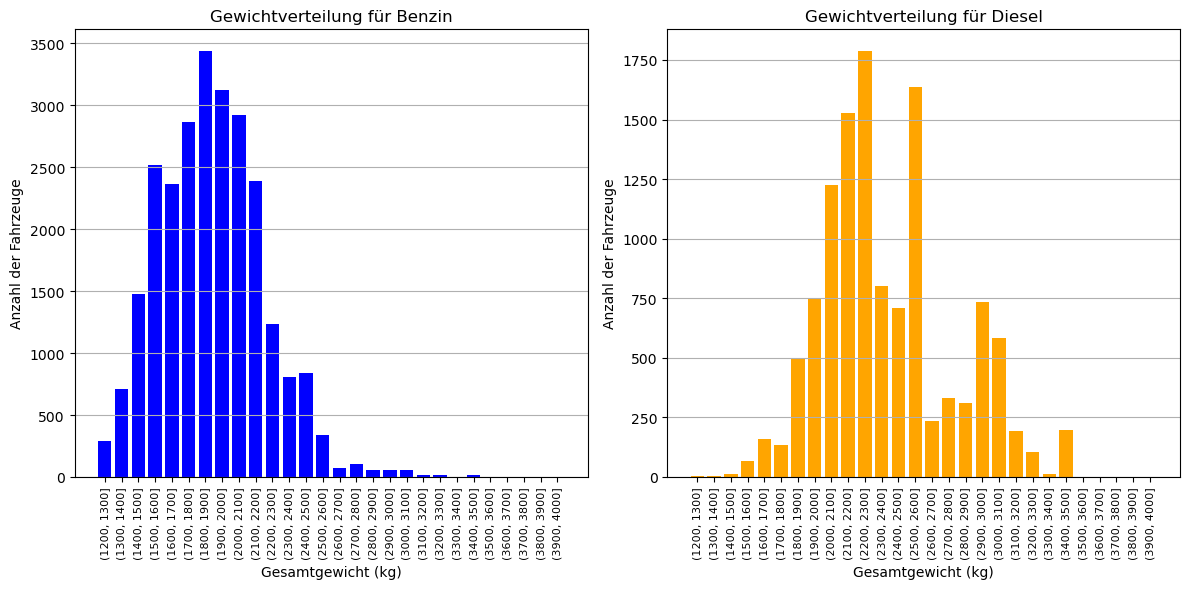

In [7]:
# Kategorien für das Gewicht in 100er-Schritten erstellen
bins = range(1200, 4100, 100)  # Von 1200 bis 4000 in Schritten von 100
fz_agg["Gewichtskategorie"] = pd.cut(fz_agg["Gesamtgewicht"], bins)

# Zählen der Fahrzeuge in jeder Gewichtskategorie für Diesel und Benzin
gewicht_verteilung = (
    fz_agg.groupby(["Treibstoff", "Gewichtskategorie"]).size().unstack(fill_value=0)
)

# Barplot für Benzin
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(gewicht_verteilung.columns.astype(str), gewicht_verteilung.loc[1], color="blue")
plt.title("Gewichtverteilung für Benzin")
plt.xlabel("Gesamtgewicht (kg)")
plt.ylabel("Anzahl der Fahrzeuge")
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis="y")

# Barplot für Diesel
plt.subplot(1, 2, 2)
plt.bar(
    gewicht_verteilung.columns.astype(str), gewicht_verteilung.loc[2], color="orange"
)
plt.title("Gewichtverteilung für Diesel")
plt.xlabel("Gesamtgewicht (kg)")
plt.ylabel("Anzahl der Fahrzeuge")
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis="y")

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

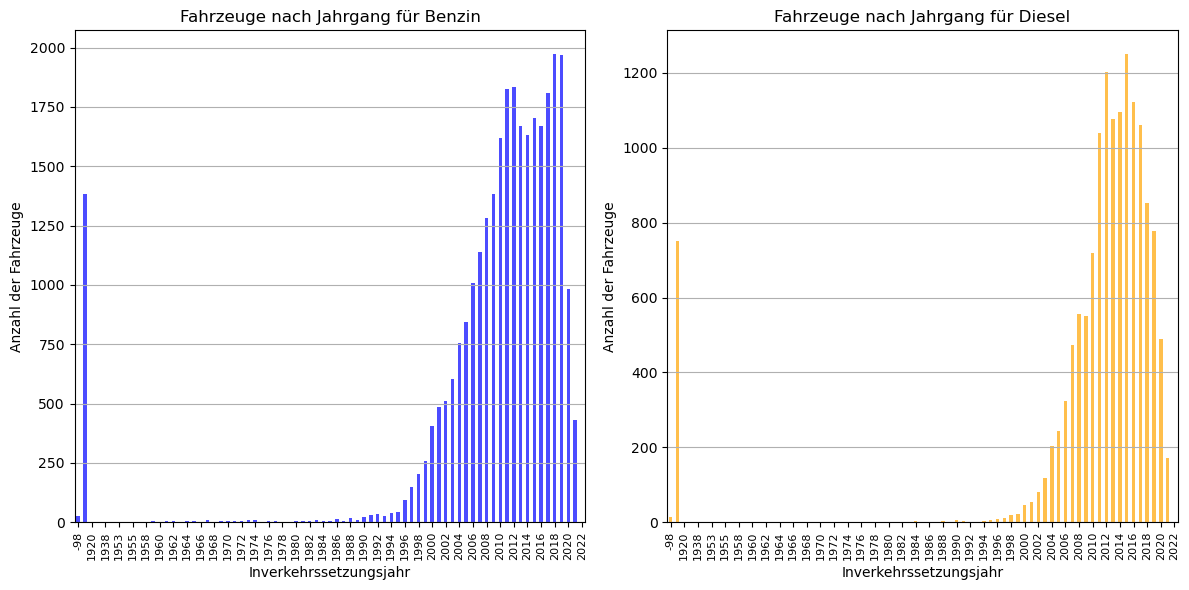

In [8]:
# Zählen der Fahrzeuge nach Jahrgang und Treibstoff
jahrgang_verteilung = (
    fz_agg.groupby(["Inverkehrssetzung_Jahr", "Treibstoff"])
    .size()
    .unstack(fill_value=0)
)

# Barplot für Benzin
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
jahrgang_verteilung[1].plot(
    kind="bar", color="blue", alpha=0.7
)  # Treibstoff = 1 (Benzin)
plt.title("Fahrzeuge nach Jahrgang für Benzin")
plt.xlabel("Inverkehrssetzungsjahr")
plt.ylabel("Anzahl der Fahrzeuge")
plt.xticks(
    ticks=range(0, len(jahrgang_verteilung.index), 2),
    labels=jahrgang_verteilung.index[::2].astype(int),
    rotation=90,
    fontsize=8,
)
plt.grid(axis="y")

# Barplot für Diesel
plt.subplot(1, 2, 2)
jahrgang_verteilung[2].plot(
    kind="bar", color="orange", alpha=0.7
)  # Treibstoff = 2 (Diesel)
plt.title("Fahrzeuge nach Jahrgang für Diesel")
plt.xlabel("Inverkehrssetzungsjahr")
plt.ylabel("Anzahl der Fahrzeuge")
plt.xticks(
    ticks=range(0, len(jahrgang_verteilung.index), 2),
    labels=jahrgang_verteilung.index[::2].astype(int),
    rotation=90,
    fontsize=8,
)
plt.grid(axis="y")

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

In [9]:
def categorize_fuel(row):
    # Kategorie für Motorräder
    # Hier wird der Flottendurchschnitt Motorrad genommen
    if row["Fahrzeugtyp"] == 2:
        return "Motorrad"

    # Kategorie für Benzin mit Unterscheidung nach Alter und Größe
    # Kategorieneinteilung erfolgt anhand dem Umweltrechner Verkehr von Energieschweiz
    elif row["Treibstoff"] == 1:
        if row["Inverkehrssetzung_Jahr"] >= 2015 and row["Gesamtgewicht"] >= 2100:
            return "Benzin - Neu & sehr schwer"
        elif row["Inverkehrssetzung_Jahr"] >= 2015 and row["Gesamtgewicht"] < 1300:
            return "Benzin - Neu & Leicht"
        elif row["Inverkehrssetzung_Jahr"] < 2015 and row["Gesamtgewicht"] >= 2100:
            return "Benzin - Alt & sehr schwer"
        elif row["Inverkehrssetzung_Jahr"] < 2015 and row["Gesamtgewicht"] < 1300:
            return "Benzin - Alt & Leicht"
        elif (
            row["Inverkehrssetzung_Jahr"] >= 2015
            and 1301 <= row["Gesamtgewicht"] < 1600
        ):
            return "Benzin - Neu & Mittel"
        elif (
            row["Inverkehrssetzung_Jahr"] < 2015 and 1301 <= row["Gesamtgewicht"] < 1600
        ):
            return "Benzin - Alt & Mittel"
        elif (
            row["Inverkehrssetzung_Jahr"] >= 2015
            and 1601 <= row["Gesamtgewicht"] < 2100
        ):
            return "Benzin - Neu & Schwer"
        elif (
            row["Inverkehrssetzung_Jahr"] < 2015 and 1601 <= row["Gesamtgewicht"] < 2100
        ):
            return "Benzin - Alt & Schwer"

    # Kategorie für Diesel mit Unterscheidung nach Alter und Größe
    # Kategorieneinteilung erfolgt anhand dem Umweltrechner Verkehr von Energieschweiz
    elif row["Treibstoff"] == 2:
        if row["Inverkehrssetzung_Jahr"] >= 2015 and row["Gesamtgewicht"] >= 2100:
            return "Diesel - Neu & sehr schwer"
        elif row["Inverkehrssetzung_Jahr"] >= 2015 and row["Gesamtgewicht"] < 1300:
            return "Diesel - Neu & Leicht"
        elif row["Inverkehrssetzung_Jahr"] < 2015 and row["Gesamtgewicht"] >= 2100:
            return "Diesel - Alt & sehr schwer"
        elif row["Inverkehrssetzung_Jahr"] < 2015 and row["Gesamtgewicht"] < 1300:
            return "Diesel - Alt & Leicht"
        elif (
            row["Inverkehrssetzung_Jahr"] >= 2015
            and 1301 <= row["Gesamtgewicht"] < 1600
        ):
            return "Diesel - Neu & Mittel"
        elif (
            row["Inverkehrssetzung_Jahr"] < 2015 and 1301 <= row["Gesamtgewicht"] < 1600
        ):
            return "Diesel - Alt & Mittel"
        elif (
            row["Inverkehrssetzung_Jahr"] >= 2015
            and 1601 <= row["Gesamtgewicht"] < 2100
        ):
            return "Diesel - Neu & Schwer"
        elif (
            row["Inverkehrssetzung_Jahr"] < 2015 and 1601 <= row["Gesamtgewicht"] < 2100
        ):
            return "Diesel - Alt & Schwer"

    # Kategorie für Hybrid
    elif row["Treibstoff"] in [6, 8]:
        return "Hybrid"

    # Kategorie für Elektrisch
    # Hier wird der Flottendurchschnitt Batterieelektrisch genommen
    elif row["Treibstoff"] == 7:
        return "Elektrisch"

    # Standardkategorie für alle anderen Fälle
    # Hier wird der Gesamtflottendurchschnitt genommen
    else:
        return "Andere"

In [10]:
# Anwendung der Funktion auf den DataFrame 'fz_agg'
fz_agg["Fahrzeugkategorie"] = fz_agg.apply(categorize_fuel, axis=1)

In [11]:
# Anzeige der Verteilung der Fahrzeugkategorien
fz_agg["Fahrzeugkategorie"].value_counts()

Benzin - Alt & Schwer         9265
Diesel - Alt & sehr schwer    5207
Benzin - Neu & Schwer         5198
Diesel - Neu & sehr schwer    4046
Benzin - Alt & Mittel         3561
Benzin - Alt & sehr schwer    3331
Benzin - Alt & Leicht         3202
Benzin - Neu & sehr schwer    2926
Diesel - Alt & Schwer         1794
Hybrid                        1584
Diesel - Alt & Leicht         1560
Benzin - Neu & Leicht         1408
Benzin - Neu & Mittel          953
Diesel - Neu & Schwer          887
Andere                         878
Diesel - Neu & Leicht          784
Elektrisch                     387
Motorrad                       307
Diesel - Alt & Mittel           72
Diesel - Neu & Mittel            4
Name: Fahrzeugkategorie, dtype: int64

In [12]:
# Durchschnittsjahrgang und Durchschnittsgewicht für jede Kategorie berechnen
durchschnittswerte = (
    fz_agg.groupby("Fahrzeugkategorie")
    .agg({"Inverkehrssetzung_Jahr": "median", "Gesamtgewicht": "mean"})
    .reset_index()
)

# Spalten umbenennen für bessere Lesbarkeit
durchschnittswerte.columns = [
    "Fahrzeugkategorie",
    "Durchschnittsjahrgang",
    "Durchschnittsgewicht",
]

# Ergebnis anzeigen
print(durchschnittswerte)

             Fahrzeugkategorie  Durchschnittsjahrgang  Durchschnittsgewicht
0                       Andere                  -97.0            273.464692
1        Benzin - Alt & Leicht                 1999.0             66.811056
2        Benzin - Alt & Mittel                 2008.0           1494.337546
3        Benzin - Alt & Schwer                 2009.0           1856.692175
4   Benzin - Alt & sehr schwer                 2010.0           2296.545782
5        Benzin - Neu & Leicht                 2018.0             22.412642
6        Benzin - Neu & Mittel                 2017.0           1494.575026
7        Benzin - Neu & Schwer                 2017.0           1859.548095
8   Benzin - Neu & sehr schwer                 2018.0           2311.546138
9        Diesel - Alt & Leicht                 2000.0            -96.444231
10       Diesel - Alt & Mittel                 2008.0           1526.750000
11       Diesel - Alt & Schwer                 2010.0           1940.840580
12  Diesel -

Im Umweltrechner Verkehr von Energieschweiz kann leider nicht jeder Jahrgang und auch nicht ein genaues Gewicht angegeben werden. <br>
Aus diesem Grund wird pauschal für alte Fahrzeuge der Jahrgang 2008 angenommen und für neuere Fahrzeuge wird der Jahrgang 2018 verwendet.<br>
Die Einteilung in Gewichtskategorien wurde schon anhand des Umweltrechners vorgenommen. Dies führt leider zu teilweise sehr kleinen Kategorien.

Hinzuziehen der Emissionswerte und Zusammenführung mit den Fahrzeugen

In [13]:
# Einlesen der berechneten Emissionswerte
emissionen = pd.read_csv(
    "Data/berechnete_emissionen.csv", sep=";", encoding="utf-8", nrows=33
)

In [14]:
# behalten der relevanten Spalten
relevant_columns_emissionen = [
    "name",
    "gwp100a_direct_[g]",
    "gwp100a_directNonExhaust_[g]",
    "gwp100a_energyChain_[g]",
    "gwp100a_maintenance_[g]",
    "gwp100a_vehicle_[g]",
    "gwp100a_endOfLife_[g]",
    "gwp100a_infrastructure_[g]",
]

emissionen = emissionen[relevant_columns_emissionen]

In [15]:
# Berechnen der CO2-Emissionen pro Kilometer
emissionen["gwp_pro_Kilometer_[g]"] = (
    emissionen["gwp100a_direct_[g]"]
    + emissionen["gwp100a_directNonExhaust_[g]"]
    + emissionen["gwp100a_energyChain_[g]"]
    + emissionen["gwp100a_maintenance_[g]"]
    + emissionen["gwp100a_vehicle_[g]"]
    + emissionen["gwp100a_endOfLife_[g]"]
    + emissionen["gwp100a_infrastructure_[g]"]
)
# Nur relevante Spalten behalten
emissionen = emissionen[["name", "gwp_pro_Kilometer_[g]"]]

In [16]:
emissionen

,name,gwp_pro_Kilometer_[g]
0,Anderes Auto,187.277675
1,Benzin - Alt & Leicht,153.016353
2,Benzin - Alt & Mittel,179.933910
3,Benzin - Alt & Schwer,248.652706
4,Benzin - Neu & Leicht,133.674807
5,Benzin - Neu & Mittel,155.533366
6,Benzin - Neu & Schwer,208.008658
7,Diesel - Alt & Leicht,129.352155
8,Diesel - Alt & Mittel,148.760623
9,Diesel - Alt & Schwer,212.942222


In [17]:
# Zusammenführen der Emissionsdaten mit den Fahrzeugen
fz_agg = fz_agg.merge(
    emissionen, left_on="Fahrzeugkategorie", right_on="name", how="left"
)

# Nur relevanten Spalten behalten
fz_agg = fz_agg[["Haushaltsnummer", "Fahrzeugkategorie", "gwp_pro_Kilometer_[g]"]]

In [18]:
fz_agg

,Haushaltsnummer,Fahrzeugkategorie,gwp_pro_Kilometer_[g]
0,110001,Benzin - Alt & Leicht,153.016353
1,110008,Benzin - Alt & Schwer,248.652706
2,110011,Benzin - Alt & Leicht,153.016353
3,110026,Motorrad,164.683791
4,110027,Benzin - Alt & Leicht,153.016353
...,...,...,...
47549,459981,Benzin - Alt & Leicht,153.016353
47550,459987,Benzin - Alt & sehr schwer,279.279378
47551,459988,Diesel - Neu & sehr schwer,215.185202
47552,459991,Benzin - Alt & Leicht,153.016353


Berechnung der Emissionen pro Etappe

In [19]:
# Nur relevante Spalten behalten
etappen = etappen[
    [
        "HHNR",
        "ETNR",
        "WEGNR",
        "f51300",
        "f52900",
        "rdist",
        "S_X",
        "S_Y",
        "Z_X",
        "Z_Y",
        "f51700",
    ]
]

# Umbenennen der Spalten
etappen = etappen.rename(
    columns={
        "ETNR": "Etappennummer",
        "WEGNR": "Wegnummer",
        "f51300": "Verkehrsmittel",
        "f52900": "Zweck",
        "rdist": "Distanz_km",
        "S_X": "Start_X",
        "S_Y": "Start_Y",
        "Z_X": "Ziel_X",
        "Z_Y": "Ziel_Y",
        "f51700": "Freizeitaktivität",
    }
)

In [20]:
# Pseudeetappen rauslöschen
etappen = etappen[etappen["Verkehrsmittel"] != -99].reset_index(drop=True)

In [21]:
# Zuordnung der Verkehrsmittel zu den Kategorien
verkehrsmittel_etappen = {
    -98: "Anderes",
    -97: "Anderes",
    1: "Zu Fuss",
    2: "Velo",
    3: "E-Bike_25",
    4: "E-Bike_45",
    5: "Mofa",
    6: "Mofa",  # Kleinmotorrad wird als Mofa gewertet
    7: "Motorrad",
    8: "Motorrad",
    9: "Auto",
    10: "Auto",
    11: "Zug",
    12: "Bus",
    13: "Tram",
    14: "Auto",  # Taxi wird als Auto gewertet
    15: "Auto",  # Taxi wird als Auto gewertet
    16: "Reisecar",
    17: "Reisecar",  # Lastwagen wird als Reisecar gewertet
    18: "Schiff",
    19: "Flugzeug",
    20: "Seilbahn",
    21: "Fahrzeugähnliche Geräte",  # Annahme: E-Scooter oder ähnliches
    95: "Anderes",
}

In [22]:
# Zuordnung der Verkehrsmittelnamen
etappen["Verkehrsmittel"] = etappen["Verkehrsmittel"].map(verkehrsmittel_etappen)

# Falls immer noch Zahl, dann 'Anderes'
etappen["Verkehrsmittel"] = etappen["Verkehrsmittel"].fillna("Anderes")

In [23]:
# Setze 'Verkehrsmittel' auf 'Flugzeug_Europa' für Distanzen <= 3000 km und Verkehrsmittel 'Flugzeug'
etappen.loc[
    (etappen["Verkehrsmittel"] == "Flugzeug") & (etappen["Distanz_km"] <= 3000),
    "Verkehrsmittel",
] = "Flugzeug_Europa"

# Setze 'Verkehrsmittel' auf 'Flugzeug_Interkontinental' für Distanzen > 3000 km und Verkehrsmittel 'Flugzeug'
etappen.loc[
    (etappen["Verkehrsmittel"] == "Flugzeug") & (etappen["Distanz_km"] > 3000),
    "Verkehrsmittel",
] = "Flugzeug_Interkontinental"

In [24]:
# Merge mit den Emissionen
etappen = etappen.merge(
    emissionen, left_on="Verkehrsmittel", right_on="name", how="left"
)

# Emissionen der Autos
# Die Zeilen in `etappen` mit Verkehrsmittel "Auto" und ihren gwp_pro_Kilometer_[g] aktualisieren
etappen = etappen.merge(
    fz_agg[["Haushaltsnummer", "gwp_pro_Kilometer_[g]"]],
    how="left",
    left_on="HHNR",
    right_on="Haushaltsnummer",
    suffixes=("", "_auto"),
)

# Nur für die Zeilen mit Verkehrsmittel "Auto" den Wert aktualisieren
etappen.loc[etappen["Verkehrsmittel"] == "Auto", "gwp_pro_Kilometer_[g]"] = etappen[
    "gwp_pro_Kilometer_[g]_auto"
]

# Die Hilfsspalte entfernen
etappen.drop(
    columns=["Haushaltsnummer", "gwp_pro_Kilometer_[g]_auto", "name"], inplace=True
)

# Für Verkehrsmittel "Zu Fuss" den Wert auf 0 setzen, Emissionswert ist hier vernachlässigbar klein
etappen.loc[etappen["Verkehrsmittel"] == "Zu Fuss", "gwp_pro_Kilometer_[g]"] = 0

# Auffüllen von Verkehrmittel "Anderes" mit dem Durchschnittswert
etappen["gwp_pro_Kilometer_[g]"] = etappen["gwp_pro_Kilometer_[g]"].fillna(
    emissionen["gwp_pro_Kilometer_[g]"].mean()
)

In [25]:
# Emissionen der Etappen berechnen
etappen["Emissionen"] = etappen["Distanz_km"] * etappen["gwp_pro_Kilometer_[g]"]

In [26]:
etappen

,HHNR,Etappennummer,Wegnummer,Verkehrsmittel,Zweck,Distanz_km,Start_X,Start_Y,Ziel_X,Ziel_Y,Freizeitaktivität,gwp_pro_Kilometer_[g],Emissionen
0,110001,1,1,Auto,5,0.413,6.559870,46.549366,6.564175,46.548909,-99,153.016353,63.195754
1,110001,2,2,Auto,4,1.483,6.564175,46.548909,6.573270,46.553510,-99,153.016353,226.923251
2,110001,3,3,Auto,11,1.407,6.573270,46.553510,6.559870,46.549366,-99,153.016353,215.294008
3,110001,4,4,Auto,8,3.973,6.559870,46.549366,6.552598,46.568205,2,153.016353,607.933969
4,110001,5,5,Auto,5,4.811,6.552598,46.568205,6.554009,46.540095,-99,153.016353,736.161673
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204930,459991,2,2,Auto,11,0.757,7.703453,47.342052,7.703367,47.347070,-99,153.016353,115.833379
204931,459995,1,1,Zu Fuss,4,1.151,8.200570,47.476312,8.209178,47.482119,-99,0.000000,0.000000
204932,459995,2,2,Zu Fuss,1,0.078,8.209178,47.482119,8.209288,47.481561,-99,0.000000,0.000000
204933,459995,3,2,Zug,1,1.410,8.209288,47.481561,8.197234,47.477323,-99,7.097596,10.007611


In [27]:
# Berechnung der Emissionen pro Weg
# Gruppierung nach HHNR und Wegnummer, Summierung der Distanz und Emissionen, Zusammenfassung der Verkehrsmittel und Zwecke
wege_agg = (
    etappen.groupby(["HHNR", "Wegnummer"])
    .agg(
        {
            "Distanz_km": "sum",
            "Emissionen": "sum",
            "Verkehrsmittel": lambda x: ", ".join(x),
        }
    )
    .reset_index()
)

Visualisierungen Etappen & Wege Freizeit

In [28]:
# Nur Etappen mit Freizeit als Zweck behalten
etappen_freizeit = etappen[etappen["Zweck"] == 8].reset_index(drop=True)
etappen_freizeit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37779 entries, 0 to 37778
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HHNR                   37779 non-null  int64  
 1   Etappennummer          37779 non-null  int64  
 2   Wegnummer              37779 non-null  int64  
 3   Verkehrsmittel         37779 non-null  object 
 4   Zweck                  37779 non-null  int64  
 5   Distanz_km             37779 non-null  float64
 6   Start_X                37779 non-null  float64
 7   Start_Y                37779 non-null  float64
 8   Ziel_X                 37779 non-null  float64
 9   Ziel_Y                 37779 non-null  float64
 10  Freizeitaktivität      37779 non-null  int64  
 11  gwp_pro_Kilometer_[g]  37779 non-null  float64
 12  Emissionen             37779 non-null  float64
dtypes: float64(7), int64(5), object(1)
memory usage: 3.7+ MB


In [29]:
wege_freizeit_agg = (
    etappen_freizeit.groupby(["HHNR", "Wegnummer"])
    .agg(
        {
            "Distanz_km": "sum",
            "Emissionen": "sum",
            "Verkehrsmittel": lambda x: ", ".join(x),
        }
    )
    .reset_index()
)
wege_freizeit_agg.head()

,HHNR,Wegnummer,Distanz_km,Emissionen,Verkehrsmittel
0,110001,4,3.973,607.933969,Auto
1,110001,6,0.404,61.818606,Auto
2,110008,1,5.778,0.000000,Zu Fuss
3,110008,4,3.262,0.000000,Zu Fuss
4,110011,1,0.556,0.000000,Zu Fuss


In [30]:
wege_freizeit_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37172 entries, 0 to 37171
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HHNR            37172 non-null  int64  
 1   Wegnummer       37172 non-null  int64  
 2   Distanz_km      37172 non-null  float64
 3   Emissionen      37172 non-null  float64
 4   Verkehrsmittel  37172 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.4+ MB


Speichern der Daten

In [31]:
etappen_freizeit.to_csv(
    "generated_data/etappen_freizeit.csv", sep=";", index=False, encoding="utf-8"
)
wege_freizeit_agg.to_csv(
    "generated_data/wege_freizeit_agg.csv", sep=";", index=False, encoding="utf-8"
)

Visualisierungen

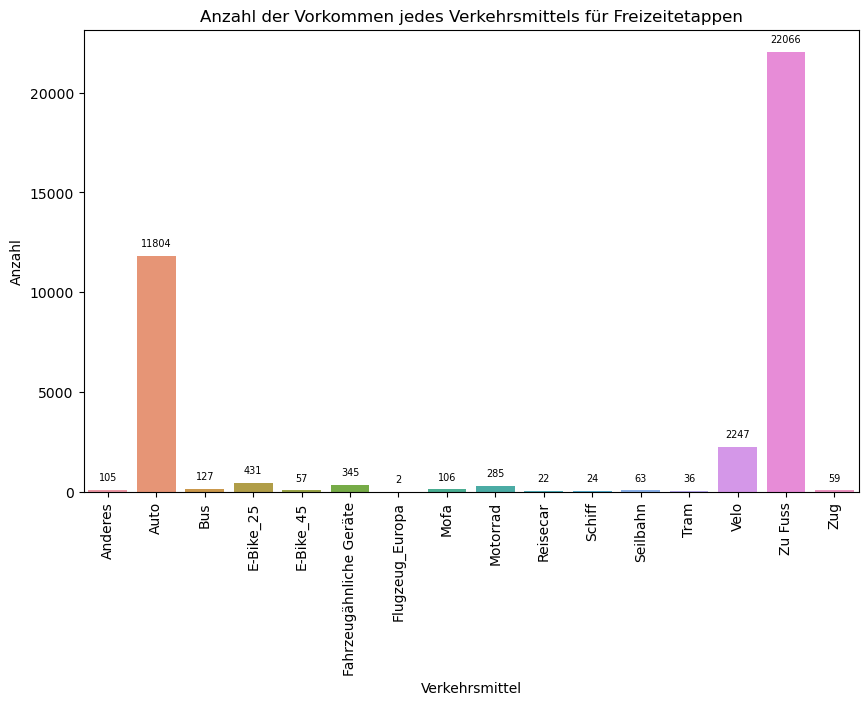

In [32]:
# Zählen der Vorkommen jedes Verkehrsmittels
verkehrsmittel_count = etappen_freizeit["Verkehrsmittel"].value_counts().sort_index()

# Erstellen des Barplots
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=verkehrsmittel_count.index, y=verkehrsmittel_count.values)

# Hinzufügen von Achsenbeschriftungen und Titel
plt.xlabel("Verkehrsmittel")
plt.ylabel("Anzahl")
plt.title("Anzahl der Vorkommen jedes Verkehrsmittels für Freizeitetappen")
plt.xticks(rotation=90)

# Säulen mit den jeweiligen Werten beschriften
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",  # Verwendung von int() zum Entfernen der Kommastellen
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=7,
        color="black",
        xytext=(0, 9),
        textcoords="offset points",
    )

# Plot anzeigen
plt.show()

Auffallend: Der Zug und andere öffentliche Verkehrsmittel werden extrem selten für Freizeitwege gebraucht.

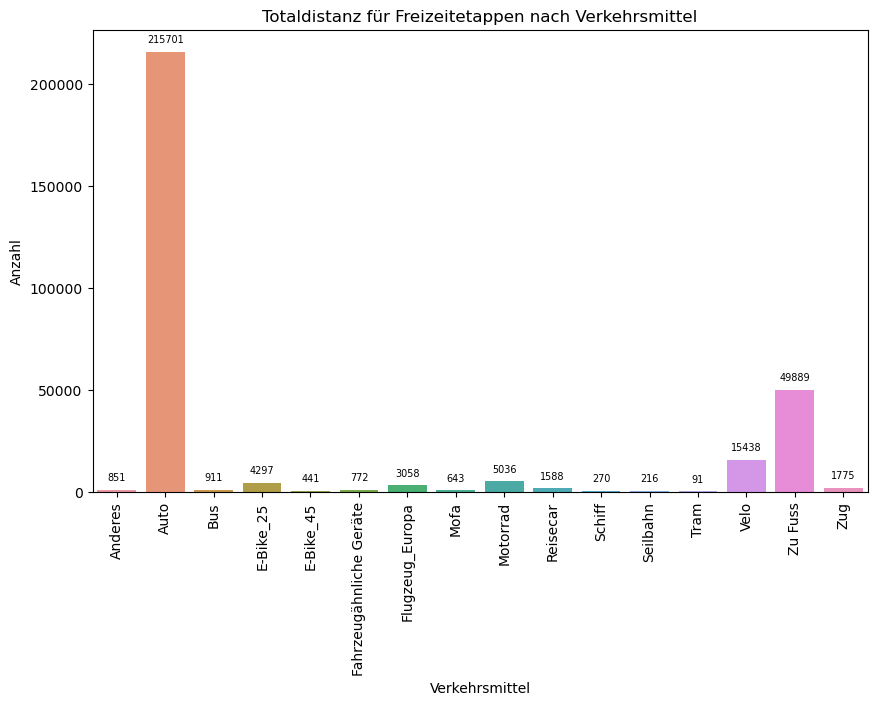

In [33]:
# Zählen der Vorkommen jedes Verkehrsmittels
verkehrsmittel_count = (
    etappen_freizeit.groupby("Verkehrsmittel")["Distanz_km"].sum().sort_index()
)

# Erstellen des Barplots
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=verkehrsmittel_count.index, y=verkehrsmittel_count.values)

# Hinzufügen von Achsenbeschriftungen und Titel
plt.xlabel("Verkehrsmittel")
plt.ylabel("Anzahl")
plt.title("Totaldistanz für Freizeitetappen nach Verkehrsmittel")
plt.xticks(rotation=90)

# Säulen mit den jeweiligen Werten beschriften
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",  # Verwendung von int() zum Entfernen der Kommastellen
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=7,
        color="black",
        xytext=(0, 9),
        textcoords="offset points",
    )

# Plot anzeigen
plt.show()

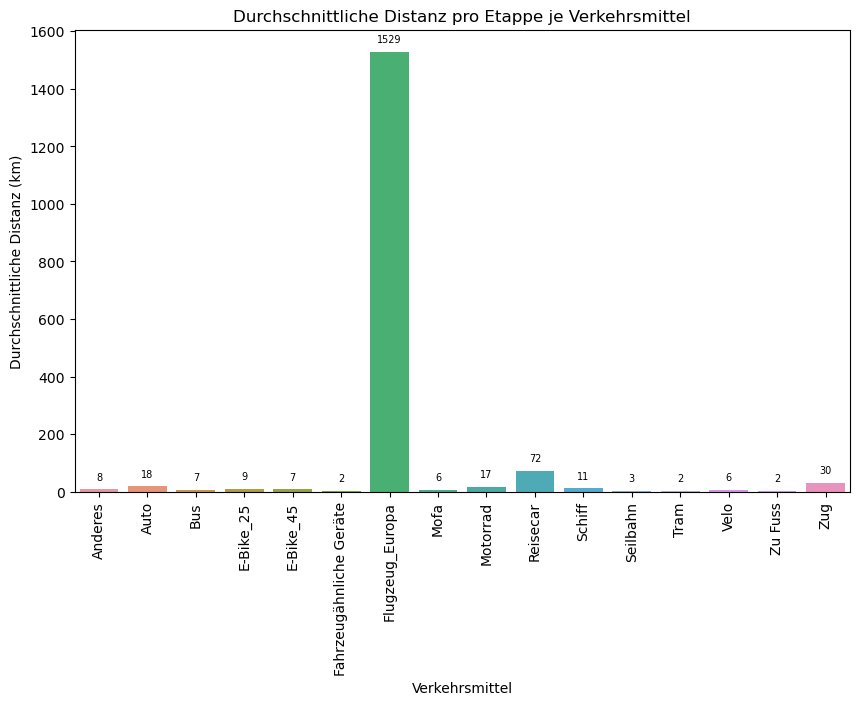

In [34]:
# Berechnen der durchschnittlichen Distanz je Verkehrsmittel
verkehrsmittel_avg_distanz = (
    etappen_freizeit.groupby("Verkehrsmittel")["Distanz_km"].mean().sort_index()
)

# Erstellen des Barplots
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=verkehrsmittel_avg_distanz.index, y=verkehrsmittel_avg_distanz.values
)

# Hinzufügen von Achsenbeschriftungen und Titel
plt.xlabel("Verkehrsmittel")
plt.ylabel("Durchschnittliche Distanz (km)")
plt.title("Durchschnittliche Distanz pro Etappe je Verkehrsmittel")
plt.xticks(rotation=90)

# Säulen mit den jeweiligen Werten beschriften
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",  # Verwendung von int() zum Entfernen der Kommastellen
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=7,
        color="black",
        xytext=(0, 9),
        textcoords="offset points",
    )

# Plot anzeigen
plt.show()

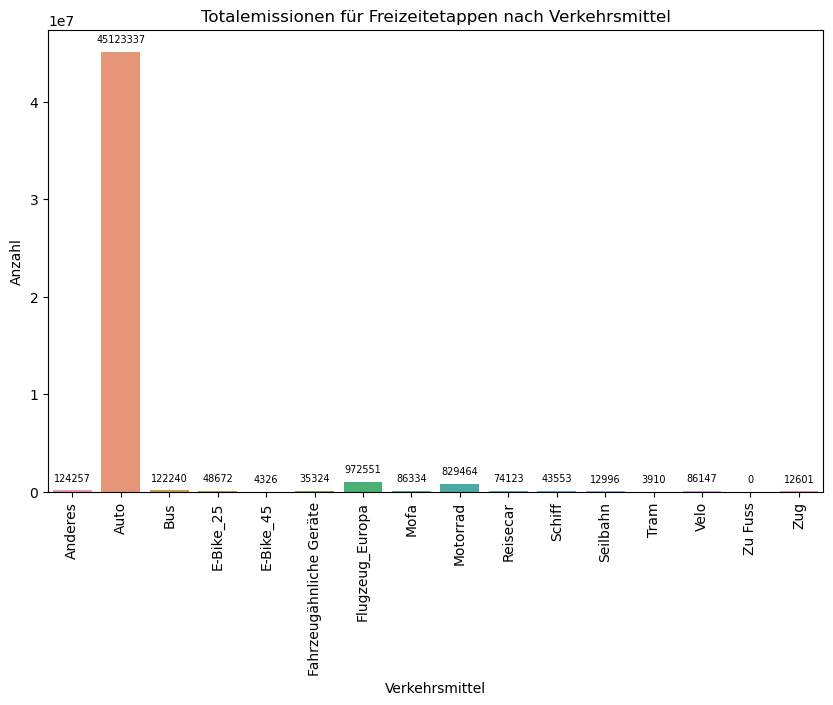

In [35]:
# Zählen der Vorkommen jedes Verkehrsmittels
emissionen_count = (
    etappen_freizeit.groupby("Verkehrsmittel")["Emissionen"].sum().sort_index()
)

# Erstellen des Barplots
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=emissionen_count.index, y=emissionen_count.values)

# Hinzufügen von Achsenbeschriftungen und Titel
plt.xlabel("Verkehrsmittel")
plt.ylabel("Anzahl")
plt.title("Totalemissionen für Freizeitetappen nach Verkehrsmittel")
plt.xticks(rotation=90)

# Säulen mit den jeweiligen Werten beschriften
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",  # Verwendung von int() zum Entfernen der Kommastellen
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=7,
        color="black",
        xytext=(0, 9),
        textcoords="offset points",
    )

# Plot anzeigen
plt.show()

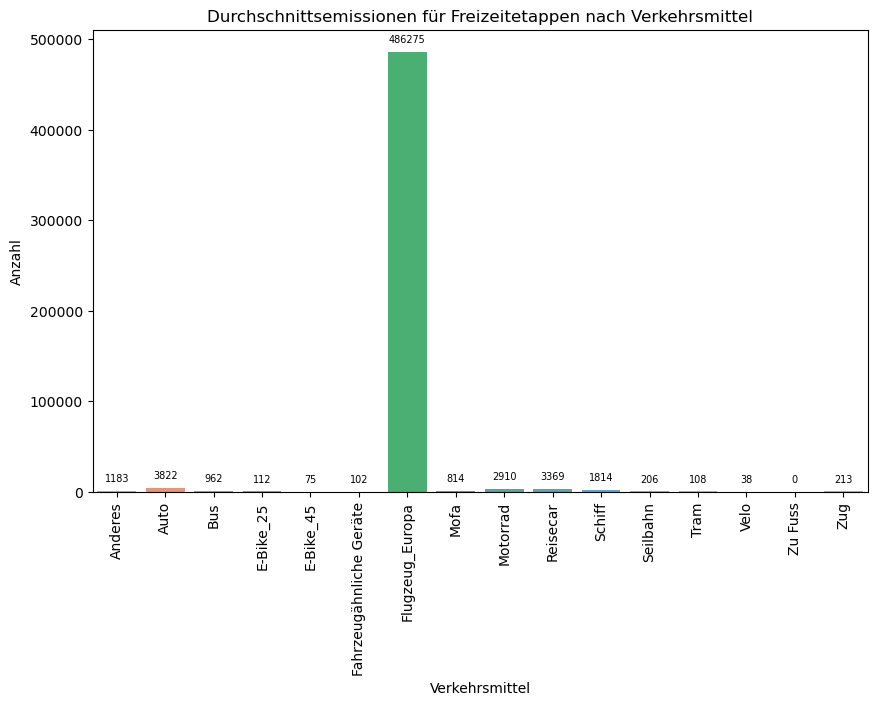

In [36]:
# Zählen der Vorkommen jedes Verkehrsmittels
emissionen_count = (
    etappen_freizeit.groupby("Verkehrsmittel")["Emissionen"].mean().sort_index()
)

# Erstellen des Barplots
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=emissionen_count.index, y=emissionen_count.values)

# Hinzufügen von Achsenbeschriftungen und Titel
plt.xlabel("Verkehrsmittel")
plt.ylabel("Anzahl")
plt.title("Durchschnittsemissionen für Freizeitetappen nach Verkehrsmittel")
plt.xticks(rotation=90)

# Säulen mit den jeweiligen Werten beschriften
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",  # Verwendung von int() zum Entfernen der Kommastellen
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=7,
        color="black",
        xytext=(0, 9),
        textcoords="offset points",
    )

# Plot anzeigen
plt.show()

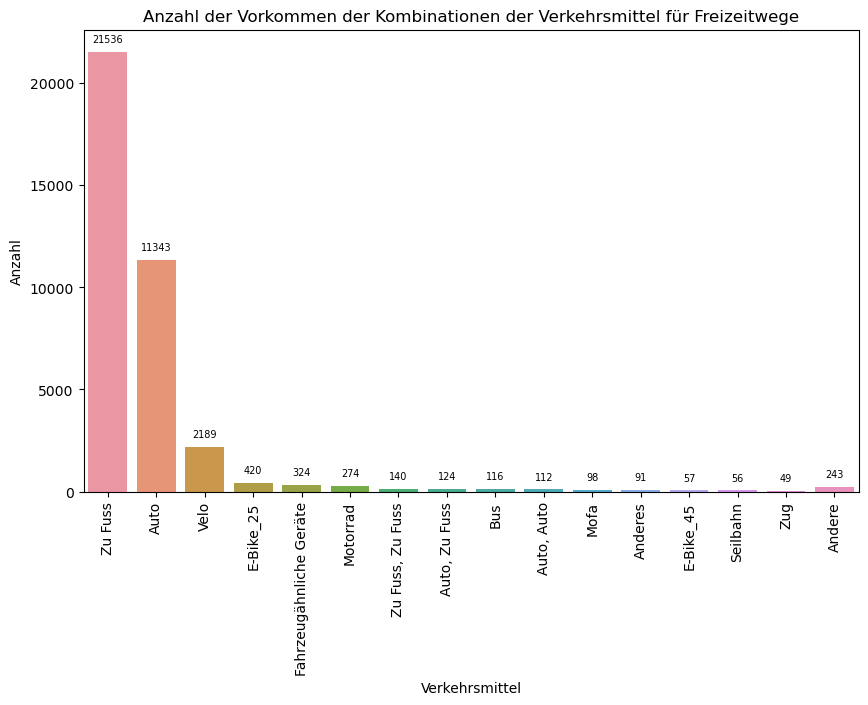

In [37]:
# Zählen der Vorkommen der Verkehrsmittel-Kombinationen
verkehrsmittel_count_wege = wege_freizeit_agg["Verkehrsmittel"].value_counts()

# Die 15 häufigsten Kombinationen auswählen
top_15_verkehrsmittel = verkehrsmittel_count_wege.head(15)

# Die restlichen Kombinationen unter "Andere" zusammenfassen
andere_verkehrsmittel = verkehrsmittel_count_wege.iloc[15:].sum()

# Die "Andere" Kategorie hinzufügen
verkehrsmittel_count_wege_top_15 = pd.concat(
    [top_15_verkehrsmittel, pd.Series({"Andere": andere_verkehrsmittel})]
)

# Erstellen des Barplots
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=verkehrsmittel_count_wege_top_15.index, y=verkehrsmittel_count_wege_top_15.values
)

# Hinzufügen von Achsenbeschriftungen und Titel
plt.xlabel("Verkehrsmittel")
plt.ylabel("Anzahl")
plt.title("Anzahl der Vorkommen der Kombinationen der Verkehrsmittel für Freizeitwege")
plt.xticks(rotation=90)

# Säulen mit den jeweiligen Werten beschriften
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",  # Verwendung von int() zum Entfernen der Kommastellen
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=7,
        color="black",
        xytext=(0, 9),
        textcoords="offset points",
    )

# Plot anzeigen
plt.show()

Bei den Freizeitwegen lässt sich praktisch keine Multimodalität feststellen.